#  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Names Of Columns
# To make access of columns more accessible

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df=pd.read_csv('../input/dataset-to-estimate-used-car-price/car_pricing.csv',names=headers)

In [4]:
print('The 15 rows of data')
df.head(15)

The 15 rows of data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
print('The  last 15 rows of data')
df.tail(15)

The  last 15 rows of data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950


As we saw that  There are missing values in the form "?" so we should change it to "Nan" to deal with each column separately 

In [6]:
# Replace '?' To 'NaN'
df.replace('?',np.nan,inplace=True)
df.head(10)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# How to work with missing data?

Steps for working with missing data:

1. dentify missing data
2. deal with missing data
3. correct data format

# dentify_missing_values

Evaluating for Missing Data
The missing values are converted to Python's default.
We use Python's built-in functions to identify these missing values.
There are two methods to detect missing data:

# 1. isnull()
# 2. notnull()



In [8]:
#for column in missing_data.columns.values.tolist():
   # print(column)
   # print(missing_data[column].value_counts())
   # print(' ')
    
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
normalized-losses,41,0.200000
price,4,0.019512
stroke,4,0.019512
bore,4,0.019512
peak-rpm,2,0.009756
horsepower,2,0.009756
num-of-doors,2,0.009756
length,0,0.000000
make,0,0.000000
fuel-type,0,0.000000


# Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. price": 4 missing data

# How to deal with missing data?
1. replace data
  1. replace it by mean
  2. replace it by frequency
  3. replace it based on other function

# 1..Replace by mean:

1. "normalized-losses": 41 missing data, replace them with mean
2. "stroke": 4 missing data, replace them with mean
3. "bore": 4 missing data, replace them with mean
4. "horsepower": 2 missing data, replace them with mean
5. "peak-rpm": 2 missing data, replace them with mean
6. " Price" : 4 missing data

# 2..Replace by frequency:
"num-of-doors": 2 missing data, replace them with "four".
> Reason: 84% sedans is four doors. Since four doors is most frequent,
> it is most likely to occur



# But first there are som columns are "Numercial" but the datatype of it is "catgorial"


In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# so, we will change these columns by using astype() built-in function

In [10]:
avg_norm_loss=df[['normalized-losses']].astype(float)
avg_bore=df[['bore']].astype(float)
missing_stroke_values=df[['stroke']].astype(float)
avg_horsepower = df[['horsepower']].astype(float)
avg_peakrpm=df[['peak-rpm']].astype(float)
avg_price=df[['price']].astype(float)

In [11]:
# Creatiing method from SimpleImputer class
impute=SimpleImputer(missing_values=np.nan,strategy='mean')

In [12]:
df[['normalized-losses']]=impute.fit_transform(df[['normalized-losses']])
df[['bore']]=impute.fit_transform(df[['bore']])
df[['stroke']]=impute.fit_transform(df[['stroke']])
df[['horsepower']]=impute.fit_transform(df[['horsepower']])
df[['peak-rpm']]=impute.fit_transform(df[['peak-rpm']])
df[["price"]]=impute.fit_transform(df[["price"]])

# Handeling Missing Data By Converting it to to most-freq

In [13]:
impute_2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
print(df['num-of-doors'].value_counts())
print(df['num-of-doors'].value_counts().idxmax())


four    114
two      89
Name: num-of-doors, dtype: int64
four


In [14]:
df[['num-of-doors']]=impute_2.fit_transform(df[['num-of-doors']])
print('Nums of doors after handeling missing data:', df['num-of-doors'].value_counts())

Nums of doors after handeling missing data: four    116
two      89
Name: num-of-doors, dtype: int64


In [15]:
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


In [16]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [17]:
print('The New Data After handeling with missing data',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# After Handeling missing data, lets do Explority Data Analysis (EDA)

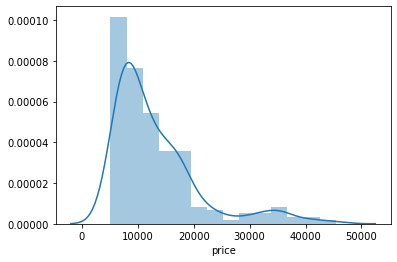

In [18]:
# Histogram
#first lets analysis price
sns.distplot(df['price'])

In [19]:
#skewness 
print("Skewness: %f" % df['price'].skew())


Skewness: 1.827324


# lets see the relationship between numerical variables and price

In [20]:
# scatter plot


(0.0, 47414.1)

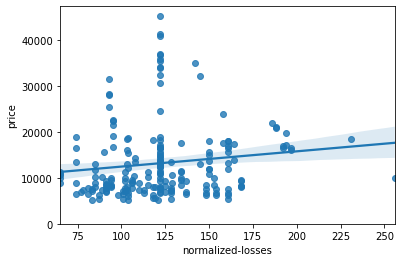

In [21]:
# regplot
sns.regplot(df['normalized-losses'],df['price'])
plt.ylim(0,)

(0.0, 52601.092463334906)

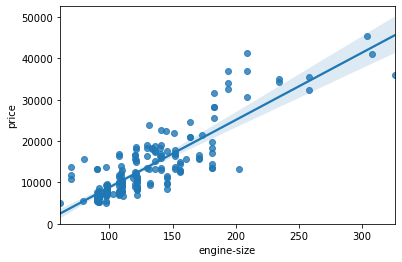

In [22]:
sns.regplot('engine-size', 'price',data=df)
plt.ylim(0,)

In [ ]:
sns.regplot('highway-mpg', 'price',data=df)
plt.ylim(0,)


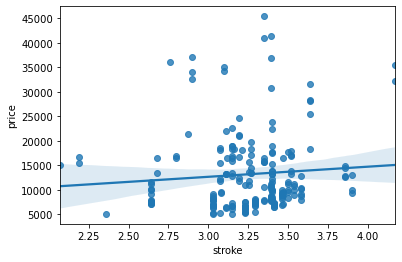

In [24]:
sns.regplot(x='stroke',y='price',data=df)

(0.0, 47414.1)

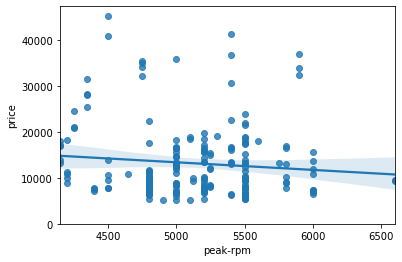

In [25]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

# Relationship with categorical features

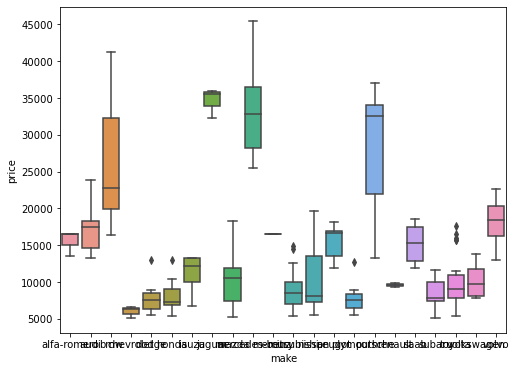

In [26]:
# boxplot
graph = pd.concat([df['price'], df['make']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='make', y="price", data=graph)


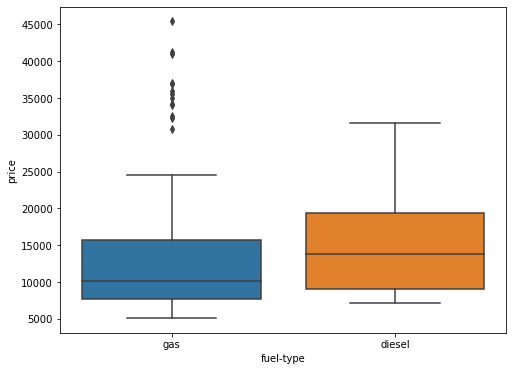

In [27]:
#box plot overallqual/saleprice

graph = pd.concat([df['price'], df['fuel-type']], axis=1)
f = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='fuel-type', y="price", data=graph)

# The correlation between features and price

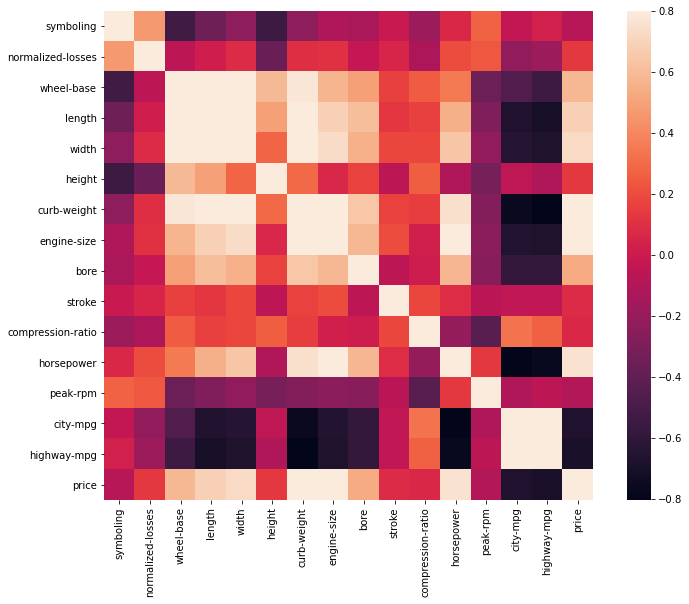

In [28]:
# The corr heatmap
corr = df.corr()
f = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

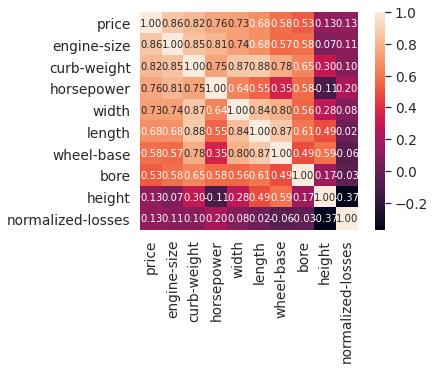

In [29]:

k = 10 #number of variables for heatmap
corr = df.corr()
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


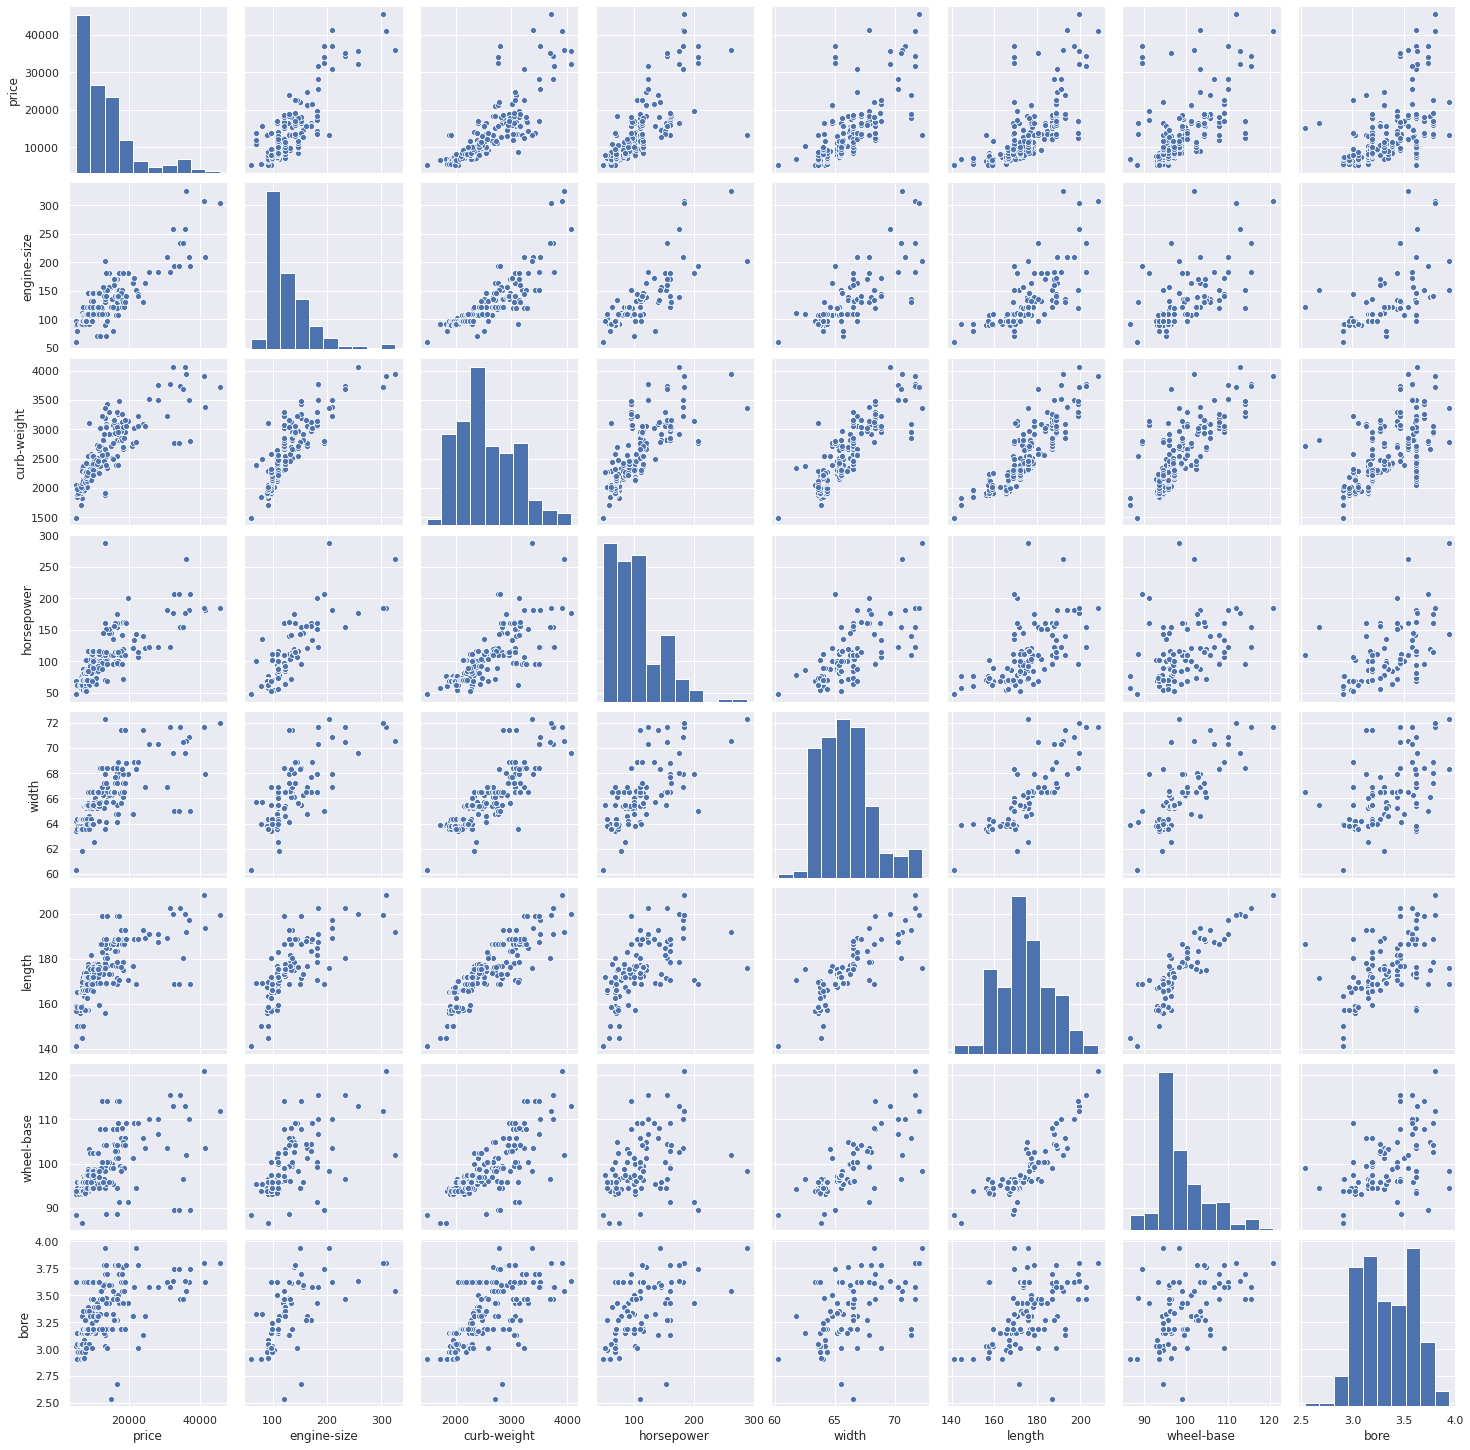

In [30]:
#scatterplot
sns.set()
cols = ['price','engine-size','curb-weight','horsepower','width','length','wheel-base','bore']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# lets convert dummy variable into nurmecial variables

In [31]:
df['fuel-type']=pd.get_dummies(df['fuel-type'])
df['aspiration']=pd.get_dummies(df['aspiration'])
df['make']=pd.get_dummies(df['make'])
df['num-of-doors']=pd.get_dummies(df['num-of-doors'])
df['body-style']=pd.get_dummies(df['body-style'])
df['drive-wheels']=pd.get_dummies(df['drive-wheels'])
df['engine-location']=pd.get_dummies(df['engine-location'])
df['engine-type']=pd.get_dummies(df['engine-type'])
df[ "num-of-cylinders"]=pd.get_dummies(df[ "num-of-cylinders"])
df["fuel-system"]=pd.get_dummies(df[ "fuel-system"])

# Splitting data

In [32]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Data scaling

In [33]:
scale=StandardScaler()
X=scale.fit_transform(X)
X=pd.DataFrame(X)
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.743470,0.000000,8.205689,-0.328798,0.469295,-1.141653,5.759051,-0.214286,0.121867,-1.690772,...,-0.158114,0.074449,-0.23812,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059
1,1.743470,0.000000,8.205689,-0.328798,0.469295,-1.141653,5.759051,-0.214286,0.121867,-1.690772,...,-0.158114,0.074449,-0.23812,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059
2,0.133509,0.000000,8.205689,-0.328798,0.469295,-1.141653,-0.173640,-0.214286,0.121867,-0.708596,...,-0.158114,0.604046,-0.23812,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627
3,0.938490,1.328961,-0.121867,-0.328798,0.469295,0.875923,-0.173640,-0.214286,0.121867,0.173698,...,-0.158114,-0.431076,-0.23812,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354
4,0.938490,1.328961,-0.121867,-0.328798,0.469295,0.875923,-0.173640,4.666667,0.121867,0.107110,...,-0.158114,0.218885,-0.23812,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900
5,0.938490,0.000000,-0.121867,-0.328798,0.469295,-1.141653,-0.173640,-0.214286,0.121867,0.173698,...,-0.158114,0.218885,-0.23812,-0.517248,0.462157,-0.414537,0.145699,0.787346,-0.953012,-0.837195
6,0.133509,1.139109,-0.121867,-0.328798,0.469295,0.875923,-0.173640,-0.214286,0.121867,1.172521,...,-0.158114,0.218885,-0.23812,-0.517248,0.462157,-0.414537,0.145699,0.787346,-0.953012,-0.837195
7,0.133509,0.000000,-0.121867,-0.328798,0.469295,0.875923,-0.173640,-0.214286,0.121867,1.172521,...,-0.158114,0.218885,-0.23812,-0.517248,0.462157,-0.414537,0.145699,0.787346,-0.953012,-0.837195
8,0.133509,1.139109,-0.121867,-0.328798,-2.130854,0.875923,-0.173640,-0.214286,0.121867,1.172521,...,-0.158114,0.098522,-0.23812,-0.739320,0.462157,-0.465012,0.906682,0.787346,-1.259470,-1.565037
9,-0.671472,0.000000,-0.121867,-0.328798,-2.130854,-1.141653,-0.173640,4.666667,0.121867,0.123757,...,-0.158114,0.098522,-0.23812,-0.739320,0.462157,-0.793101,1.414003,0.787346,-1.412700,-1.273900


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Linear Regression Model

In [35]:
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
linear_accurcy = round(Regressor.score(X_train, y_train) * 100, 2)
linear_accurcy

87.15

# Random forest Model

In [36]:
Randomforest = RandomForestRegressor()
Randomforest.fit(X_train, y_train)
y_pred = Randomforest.predict(X_test)
forest_accurcy = round(Randomforest.score(X_train, y_train) * 100, 2)
forest_accurcy

98.56

# Descision Tree Model

In [37]:
Tree =DecisionTreeRegressor ()
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
tree_accurcy = round(Tree.score(X_train, y_train) * 100, 2)
tree_accurcy

99.92

# Ridge Model

In [38]:
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
ridge_accurcy=round(ridge.score(X_train, y_train) * 100, 2)
ridge_accurcy

83.52

In [41]:
models = pd.DataFrame({
    'Model': [ 'Linear Regression Model','Random forest Model',
              'Descision Tree Model','Ridge model'],
    'Score': [ linear_accurcy,forest_accurcy,
               tree_accurcy ,ridge_accurcy]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Descision Tree Model,99.92
1,Random forest Model,98.56
0,Linear Regression Model,87.15
3,Ridge model,83.52
